# Question

Define a function so that it generates 3 objects (A, B, C) with probability 0.3, 0.2, 0.5 when called.

In [1]:
import numpy as np

def generate_random():
    r = np.random.random()
    
    if r < 0.3:
        return 'A'
    elif r >= .3 and r < .5:
        return 'B'
    return 'C'

In [28]:
N = 10000
a, b, c = 0, 0, 0

for ix in range(N):
    k = generate_random()
    if k is 'A':
        a += 1
    elif k is 'B':
        b += 1
    else:
        c += 1

print float(a)/N, float(b)/N, float(c)/N

0.3007 0.1941 0.5052


## Previois Class Recap

1. __Normal__ and __Standard Normal Distributions__
2. Generating __multi-variate normal distributions__ data points

In [33]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import cv2

In [41]:
# Define mean and covariance matrices for different distributions
mean_01 = np.array([0.0, 0.0])
mean_02 = np.array([7., 6.])

cov_01 = np.array([[2.0, 1.0],
                   [1.0, 3.0]])
cov_02 = np.array([[4.0, 0.0],
                   [0.0, 2.0]])

In [44]:
# Create the different datasets

data_01 = np.random.multivariate_normal(mean_01,
                                       cov_01, 250)
data_02 = np.random.multivariate_normal(mean_02,
                                       cov_02, 250)

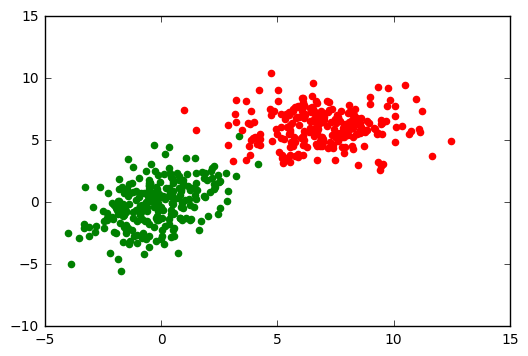

In [45]:
# Plot the datasets and visualize them

plt.figure(0)
plt.scatter(data_01[:, 0], data_01[:, 1], color='green')
plt.scatter(data_02[:, 0], data_02[:, 1], color='red')
plt.show()

## Problem Statement

Given the bunch of clusters and which class/category each point belongs to, can you predict in which class will any given point lie?

In [46]:
data_X = np.concatenate((data_01, data_02), axis=0)
print data_X.shape

(500, 2)


In [47]:
data_y = np.zeros((500, 1))
data_y[250:] = 1

data = np.concatenate((data_X, data_y), axis=1)
print data.shape

(500, 3)


In [82]:
def distance(v1, v2):
    # Eucledian distance
    return np.sqrt(((v1-v2)**2).sum())

def knn(train, test, k=3):
    dist = []
    
    for i in range(train.shape[0]):
        # Get the vector and label
        ix = train[i, :-1]
        iy = train[i, -1]
        # Compute the distance from test point
        d = distance(test, ix)
        dist.append([d, iy])
    # Sort based on distance and get top k
    dk = sorted(dist, key=lambda x: x[0])[:k]
    # Retrieve only the labels
    labels = np.array(dk)[:, -1]
    
    # Get frequencies of each label
    output = np.unique(labels, return_counts=True)
    # Find max frequency and corresponding label
    index = np.argmax(output[1])
    return output[0][index]

In [56]:
x = np.array([5.0, 4.0])

print knn(data, x, k=5)

1.0


In [59]:
from sklearn.datasets import load_digits

In [76]:
load_digits(return_X_y=True)[0].shape

(1797, 64)

In [68]:
data = load_digits(return_X_y=True)
X = data[0]
y = data[1]

print X.shape, y.shape

(1797, 64) (1797,)


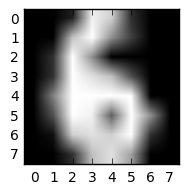

In [79]:
plt.figure(0, figsize=(2, 2))
plt.imshow(X[452].reshape((8, 8)), cmap='gray')
plt.show()

In [81]:
ds = np.concatenate((X, y.reshape((-1, 1))), axis=1)
print ds.shape

(1797, 65)


In [84]:
trainset = ds[:1500]
testset = ds[1500:]

print trainset.shape, testset.shape

(1500, 65) (297, 65)


In [98]:
import datetime




def test_on_set(trainset, testing, k=3):
    preds = []
    target = []
    # start = datetime.datetime.now()
    for ix in range(testing.shape[0]):
        out = knn(trainset, testing[ix, :-1], k=k)
        preds.append(out)
        target.append(testing[ix, -1])
    preds = np.asarray(preds)
    target = np.asarray(target)
    # stop = datetime.datetime.now()

    # print preds.shape, target.shape
    # print "Time taken: {}".format(stop - start)

    acc = float((preds == target).sum()) / len(preds)

    print "Accuracy: {} wiht k: {}".format(acc, k)
    return acc

In [99]:
accs = []
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

for kx in ks:
    acx = test_on_set(trainset, testset, k=kx)
    accs.append(acx)

Accuracy: 0.956228956229 wiht k: 2
Accuracy: 0.959595959596 wiht k: 3
Accuracy: 0.959595959596 wiht k: 4
Accuracy: 0.956228956229 wiht k: 5
Accuracy: 0.946127946128 wiht k: 6
Accuracy: 0.946127946128 wiht k: 7
Accuracy: 0.942760942761 wiht k: 8
Accuracy: 0.942760942761 wiht k: 9
Accuracy: 0.942760942761 wiht k: 10
Accuracy: 0.942760942761 wiht k: 11
Accuracy: 0.942760942761 wiht k: 12
Accuracy: 0.939393939394 wiht k: 13
Accuracy: 0.942760942761 wiht k: 14
Accuracy: 0.939393939394 wiht k: 15
Accuracy: 0.946127946128 wiht k: 16
Accuracy: 0.942760942761 wiht k: 17
Accuracy: 0.939393939394 wiht k: 18


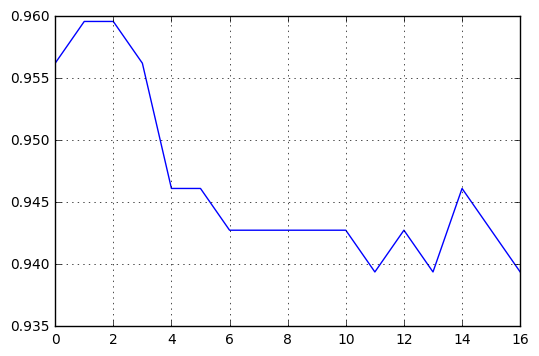

In [100]:
plt.figure(0)
plt.grid("on")
plt.plot(accs)

plt.show()